In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from classification_utils import ClassificationUtils
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

file_path = '../newData/Shifted_playoff.csv' 
df = pd.read_csv(file_path)

In [3]:
# Separazione dei dati di train (anni 1-9) e test (anno 10)
train_df = df[df['year'] < 10]
test_df = df[df['year'] == 10]

# Selezione delle feature e della variabile target
X_train = train_df.drop(columns=["PlayOffNextYear", "tmID", "year"])
y_train = train_df["PlayOffNextYear"]

X_test = test_df.drop(columns=["PlayOffNextYear", "tmID", "year"])
y_test = test_df["PlayOffNextYear"]  # Placeholder

# Scaling delle feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Logistic Regression...


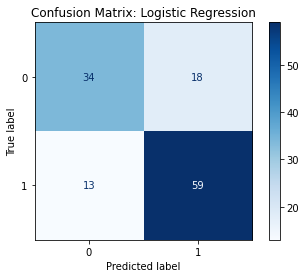

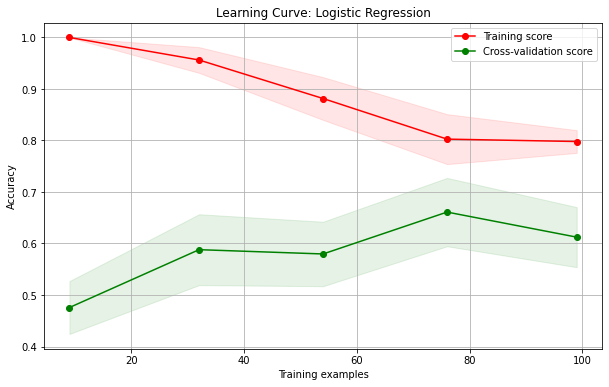

Training KNN...


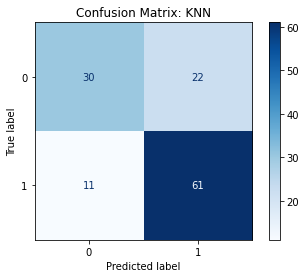

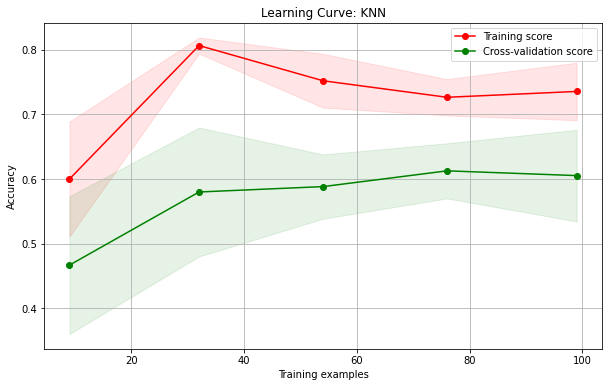

Training Random Forest...


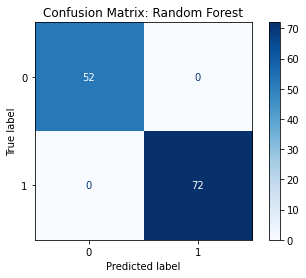

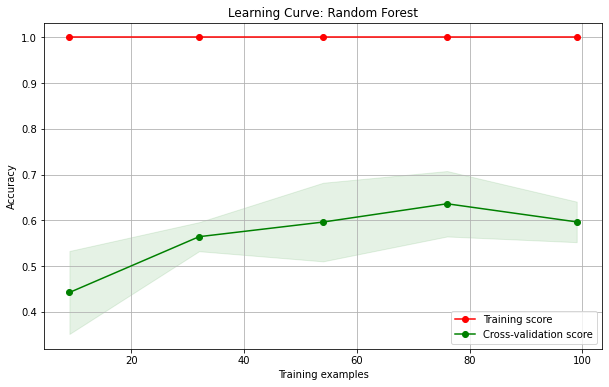

Training Naive Bayes...


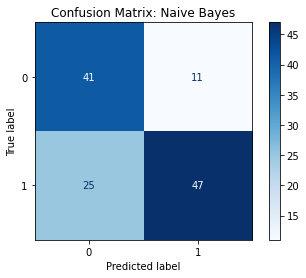

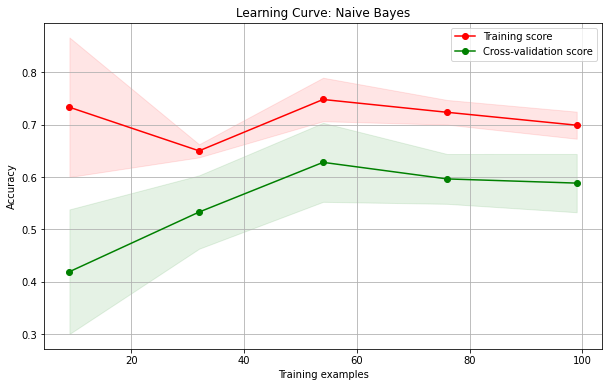

Training Decision Tree...


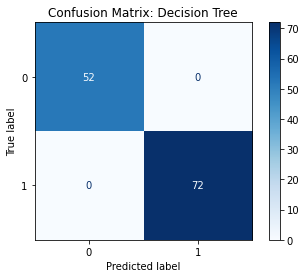

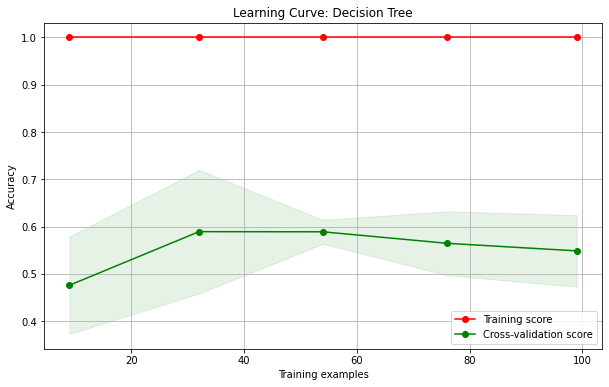

Training XGBoost...


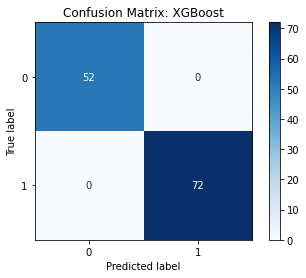

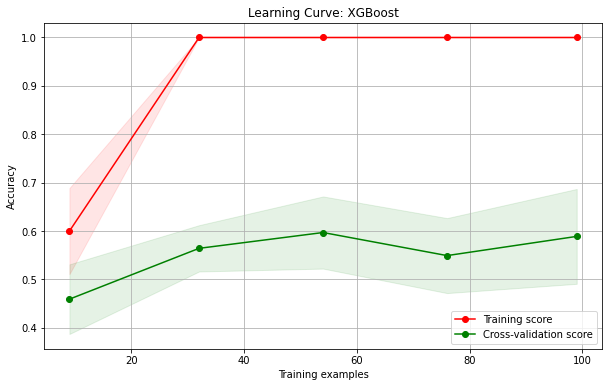

Training Gradient Boosting...


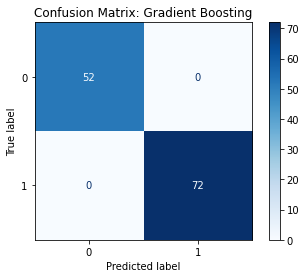

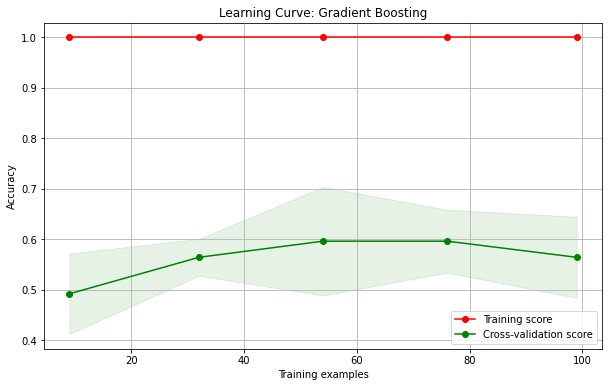

Training SVM...


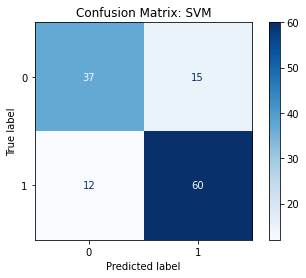

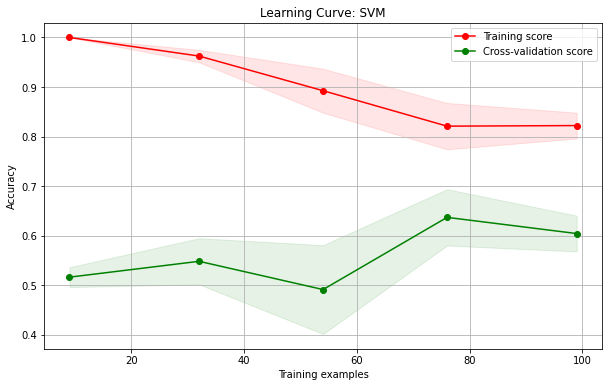

,Accuracy,Precision,Recall,F1
Logistic Regression,0.750000,0.766234,0.819444,0.791946
KNN,0.733871,0.734940,0.847222,0.787097
Random Forest,1.000000,1.000000,1.000000,1.000000
Naive Bayes,0.709677,0.810345,0.652778,0.723077
Decision Tree,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
SVM,0.782258,0.800000,0.833333,0.816327


In [4]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(kernel="linear")
}

# Training e valutazione
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Training del modello
    model.fit(X_train_scaled, y_train)
    
    # Predizioni sul training set
    predictions = model.predict(X_train_scaled)
    
    # Calcolo delle metriche
    accuracy = accuracy_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    
    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}
    
    # Grafico: Confusion Matrix
    ClassificationUtils.plot_confusion_matrix(y_train, predictions, model_name=model_name)
    
    # Grafico: Learning Curve
    ClassificationUtils.plot_learning_curve(
        estimator=model,
        X=X_train_scaled,
        y=y_train,
        title=f"Learning Curve: {model_name}",
        cv=5
    )

# Visualizzazione dei risultati
results_df = pd.DataFrame(results).T
display(results_df)


### Cross-Validation Results
We perform 5-fold cross-validation to evaluate the generalization of each model. The mean accuracy and standard deviation across folds are presented below.


In [5]:
# Validazione incrociata per ogni modello
from sklearn.model_selection import cross_val_score

cv_results = {}
for model_name, model in models.items():
    print(f"Performing cross-validation for {model_name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": scores.mean(),
        "Std Dev": scores.std()
    }

# Visualizzazione dei risultati della validazione incrociata
cv_results_df = pd.DataFrame(cv_results).T
display(cv_results_df)


Performing cross-validation for Logistic Regression...
Performing cross-validation for KNN...
Performing cross-validation for Random Forest...
Performing cross-validation for Naive Bayes...
Performing cross-validation for Decision Tree...
Performing cross-validation for XGBoost...
Performing cross-validation for Gradient Boosting...
Performing cross-validation for SVM...


,Mean Accuracy,Std Dev
Logistic Regression,0.612333,0.058382
KNN,0.605333,0.070855
Random Forest,0.611667,0.106008
Naive Bayes,0.588333,0.055718
Decision Tree,0.524000,0.032000
XGBoost,0.589000,0.098000
Gradient Boosting,0.564000,0.072000
SVM,0.604333,0.036080


### Test Set Evaluation
Finally, we evaluate each model on the test set (Year 9) to assess their generalization performance.


In [6]:
# Predizione sui dati di test (anno 10)
test_results = {}
for model_name, model in models.items():
    print(f"Making predictions for {model_name} on Year 10...")

    # Training del modello
    model.fit(X_train_scaled, y_train)

    # Predizione delle probabilità
    probabilities = model.predict_proba(X_test_scaled)[:, 1]

    # Normalizzazione delle probabilità per rispettare il vincolo ∑ Y = 8
    normalized_probabilities = 8 * probabilities / probabilities.sum()

    # Aggiunta delle probabilità al test set
    test_df[f"{model_name}_Predicted_Probability"] = probabilities
    test_df[f"{model_name}_Normalized_Probability"] = normalized_probabilities

# Visualizzazione delle predizioni per ciascun modello
display(test_df)


Making predictions for Logistic Regression on Year 10...
Making predictions for KNN on Year 10...
Making predictions for Random Forest on Year 10...
Making predictions for Naive Bayes on Year 10...
Making predictions for Decision Tree on Year 10...
Making predictions for XGBoost on Year 10...


<ipython-input-6-b3336b685552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f"{model_name}_Predicted_Probability"] = probabilities
<ipython-input-6-b3336b685552>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f"{model_name}_Normalized_Probability"] = normalized_probabilities
<ipython-input-6-b3336b685552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Making predictions for Gradient Boosting on Year 10...
Making predictions for SVM on Year 10...


<ipython-input-6-b3336b685552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f"{model_name}_Predicted_Probability"] = probabilities
<ipython-input-6-b3336b685552>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f"{model_name}_Normalized_Probability"] = normalized_probabilities
<ipython-input-6-b3336b685552>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

AttributeError: This 'SVC' has no attribute 'predict_proba'

### Prediction for Year 10 with Playoff Constraints

In this phase, we use the best model to:

1. Predict the probabilities of playoff qualification for the teams in Year 10.
2. Normalize the probabilities to ensure the sum equals 8.
3. Select the top 4 teams from each conference.
4. Add a label identifying the teams selected for the playoffs.

In [6]:
# Modello scelto: Logistic Regression
best_model = GradientBoostingClassifier()

# Training del modello
best_model.fit(X_train_scaled, y_train)

# Predizione delle probabilità di qualificazione per l'anno 10
probabilities = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilità per la classe 1 (playoff)
test_df["Predicted_Probability"] = probabilities

# Normalizzazione delle probabilità per soddisfare il vincolo ∑ Y = 8
normalized_probabilities = 8 * probabilities / probabilities.sum()
test_df["Normalized_Probability"] = normalized_probabilities

# Selezione delle 4 squadre con la probabilità maggiore per East e West
east_teams = test_df[test_df["confID"] == 1].nlargest(4, "Normalized_Probability")
west_teams = test_df[test_df["confID"] == 0].nlargest(4, "Normalized_Probability")

# Combiniamo le squadre selezionate
playoff_teams = pd.concat([east_teams, west_teams])

# Aggiunta di un'etichetta per indicare chi è stato selezionato per i playoff
test_df["Selected_Playoff"] = test_df["tmID"].isin(playoff_teams["tmID"]).astype(int)

# Visualizzazione delle squadre selezionate
print("Squadre selezionate per i playoff:")
display(playoff_teams[["tmID", "confID", "Normalized_Probability"]])

# Visualizzazione del dataframe completo con le squadre selezionate
print("Tabella completa con probabilità e selezione:")
display(test_df[["tmID", "confID", "Predicted_Probability", "Normalized_Probability", "Selected_Playoff"]])


Squadre selezionate per i playoff:


<ipython-input-6-2633c81c1ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Predicted_Probability"] = probabilities
<ipython-input-6-2633c81c1ef9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Normalized_Probability"] = normalized_probabilities
<ipython-input-6-2633c81c1ef9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,tmID,confID,Normalized_Probability
62,LAS,1,0.905754
106,SAC,1,0.840125
126,SEA,1,0.732202
116,SAS,1,0.547749
84,NYL,0,0.875105
34,DET,0,0.862068
11,CHI,0,0.814071
24,CON,0,0.633438


Tabella completa con probabilità e selezione:


,tmID,confID,Predicted_Probability,Normalized_Probability,Selected_Playoff
1,ATL,0,0.367146,0.342650,0
11,CHI,0,0.872267,0.814071,1
24,CON,0,0.678721,0.633438,1
34,DET,0,0.923696,0.862068,1
52,IND,0,0.480181,0.448144,0
62,LAS,1,0.970504,0.905754,1
74,MIN,1,0.536076,0.500310,0
84,NYL,0,0.937665,0.875105,1
94,PHO,1,0.328314,0.306410,0
106,SAC,1,0.900185,0.840125,1
